# Import Data

In [1]:
# import modules
import pandas as pd

In [2]:
# import raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
3399,"Hex3Cer 37:4;2 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.7519,...,0.0,0.0,39.1561,28.9166,0.0,0.0,0.0000,0.0,0.0000,0.0
3598,SGalCer 42:3;3 (LCB 18:0;2-2H2O),55.565,64.0,91.0,59.0,22.0,23.0,0.0,23.0,51.0000,...,0.0,32.0,27.0000,24.0000,30.0,10.0,64.0433,110.0,75.1835,72.0
3882,SGalCer 34:0;3 (LCB 18:0;2-2H2O),0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0000,12.4257,0.0,0.0,0.0000,0.0,0.0000,0.0


In [3]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
2718,PC 34:10 (PC),PC,34,10
1010,NAPE 36:8+NH4 (-NAPE (18:2 NH4)),NAPE,36,8
576,GD2 26:1;3 (LCB 17:0;2-2H2O),GD2,26,1


In [4]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.head()

,Exp,Mutation
0,CAS9-A,CAS9
1,CAS9-A.1,CAS9
2,CAS9-B,CAS9
3,CAS9-B.1,CAS9
4,CAV_A,CAV


In [5]:
# import head group metadata
df_hg = pd.read_csv('dataframes/pos_df_hg.csv')
df_hg.head(3)

,Head Group,Head Group 2
0,Hex2Cer,Hex_Cer
1,GT3,GT
2,GT2,GT


In [6]:
# merge df_hg and df_meta
df_meta2 = df_meta.merge(df_hg, on=['Head Group'])
df_meta2.head(1)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer


In [7]:
# rename columns by protein
df_p = df.rename(columns=df_exps.set_index('Exp')['Mutation'])
df_p = df_p.drop(columns=['RAJU'])
df_p = df_p.set_index('Sample Name')
df_p.columns.names=['Mutation']
df_p.head(5)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,184.3462,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,13.8507,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,224.9824,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,51.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,214.6494,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


# Normalize Data

In [8]:
# define functions to normalize down column
def norm_col(df):
    return df/df.sum()

In [9]:
def norm_row(df):
    return df.div(df.sum(axis=1), axis=0)

In [10]:
# move sample name column into index
df_norm = df_p
df_norm.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0,143.0,125.0,132.0,171.6091,182.9007,120.0,120.0,281.3523,184.3462,...,130.0,142.0,68.0529,46.4729,88.0,91.0,229.5233,278.1255,206.0,182.0


In [11]:
# normalize down the columns
df_norm_col = df_norm/df_norm.sum()
df_norm_col.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.000036,0.000032,0.000025,0.000027,0.000047,0.000051,0.000038,0.000037,0.00007,0.000046,...,0.000041,0.000041,0.00002,0.000014,0.000027,0.000027,0.000048,0.000058,0.000048,0.000041


In [12]:
# normalize across row
df_norm_row = df_norm.div(df_norm.sum(axis=1), axis=0)
df_norm_row.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.024047,0.020591,0.017999,0.019007,0.024711,0.026337,0.017279,0.017279,0.040513,0.026545,...,0.018719,0.020447,0.009799,0.006692,0.012672,0.013104,0.03305,0.040049,0.029663,0.026207


In [13]:
# normalize across both row & col
df_norm = df_norm_col.div(df_norm_col.sum(axis=1), axis=0)
df_norm.head(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.019506,0.0171,0.013386,0.014721,0.025627,0.027595,0.020395,0.020296,0.037756,0.024928,...,0.022295,0.022394,0.010866,0.007405,0.014582,0.014583,0.026141,0.031296,0.025874,0.02239


# Average/groupby protein

In [14]:
# normalized by row & col
df_norm_avg = df_norm.T.reset_index().rename(columns={'index':'Mutation'})
df_norm_avg = df_norm_avg.groupby('Mutation').mean().T
df_norm_avg.head()

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.016179,0.023478,0.029077,0.031709,0.029220,0.031893,0.029489,0.020671,0.011859,0.026425
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.064624,0.032709,0.012293,0.013645,0.011860,0.020105,0.029636,0.001913,0.047969,0.015246
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.012212,0.032689,0.022299,0.025387,0.029948,0.028250,0.024203,0.029847,0.023096,0.022069
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.017766,0.042347,0.021723,0.029091,0.023994,0.029493,0.015644,0.022888,0.026081,0.020971
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.029658,0.025001,0.020187,0.020504,0.023521,0.020142,0.018196,0.032862,0.037178,0.022752


In [15]:
# normalized by row only
df_norm_row_avg = df_norm_row.T.reset_index().rename(columns={'index':'Mutation'})
df_norm_row_avg = df_norm_row_avg.groupby('Mutation').mean().T
df_norm_row_avg.head()

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.020411,0.021402,0.031956,0.028405,0.027034,0.033241,0.027860,0.016882,0.010567,0.032242
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.078368,0.028599,0.013087,0.011465,0.010702,0.019837,0.027584,0.001504,0.041317,0.017536
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.015926,0.030322,0.025096,0.023253,0.028544,0.030185,0.023401,0.024605,0.021097,0.027571
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.022769,0.038518,0.024130,0.026532,0.022645,0.031431,0.015468,0.018809,0.023712,0.025986
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.037998,0.022715,0.022420,0.018439,0.021945,0.021170,0.017250,0.026798,0.033455,0.027809


In [16]:
# normalized by row only
df_norm_col_avg = df_norm_col.T.reset_index().rename(columns={'index':'Mutation'})
df_norm_col_avg = df_norm_col_avg.groupby('Mutation').mean().T
df_norm_col_avg.head()

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.000030,0.000043,0.000054,0.000058,0.000054,0.000059,0.000054,3.811926e-05,0.000022,0.000049
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.000012,0.000006,0.000002,0.000003,0.000002,0.000004,0.000006,3.565203e-07,0.000009,0.000003
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.000034,0.000090,0.000062,0.000070,0.000083,0.000078,0.000067,8.246657e-05,0.000064,0.000061
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.000010,0.000023,0.000012,0.000016,0.000013,0.000016,0.000009,1.247975e-05,0.000014,0.000011
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.000081,0.000068,0.000055,0.000056,0.000064,0.000055,0.000050,8.957203e-05,0.000101,0.000062


# Correlation Matrix, whole dataset

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df_corr = df_norm_avg.corr()

<AxesSubplot:xlabel='Mutation', ylabel='Mutation'>

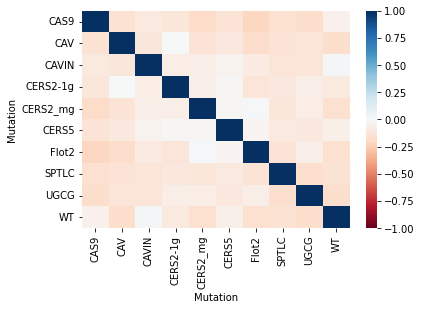

In [19]:
sns.heatmap(df_corr, vmin=-1.0,vmax=1.0, cmap='RdBu')

# Clustermap, whole dataset

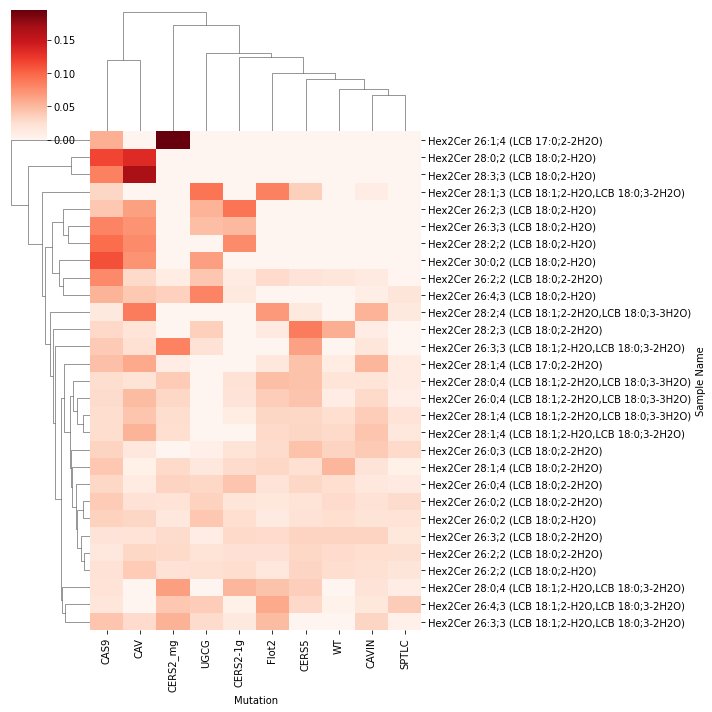

In [20]:
sns.clustermap(df_norm_row_avg.iloc[:29], cmap='Reds')

# Correlation matrix

In [21]:
'''
Returns the correlation matrix for a dataset when comparing by specific proteins.
Data is normalized by column and row. 

Inputs:
df_meta: df with lipid metadata (sample, head group, chain length, unsaturation)
df_p: df with columns named by mutation, rather than individual experiments
col: column name for variable of interest (ex: head group 2)
drop_var: variable of interest (row) to be dropped (ex: head group PE)
drop_protein: mutation (column) to be dropped (ex: WT)
title: title of graph, string
annot: include annotations, takes True or False
'''
def corr_matrix(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Correlation Matrix', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the sample
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['Mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('Mutation').mean()
    
    # normalize by the variable (column)
    df = norm_col(df)
    
    # transpose again so proteins are columns, then run a correlation matrix
    corr = df.T.corr()
    
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=annot).set_title(title)

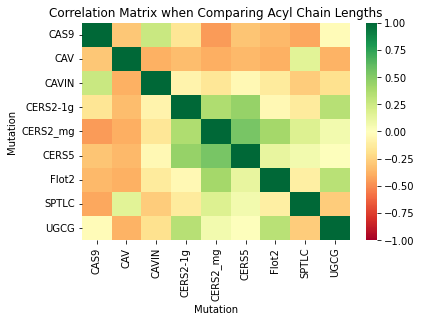

In [22]:
corr_matrix(df_meta2, df_p, 
            col='Acyl Chain Length', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Acyl Chain Lengths'
           )

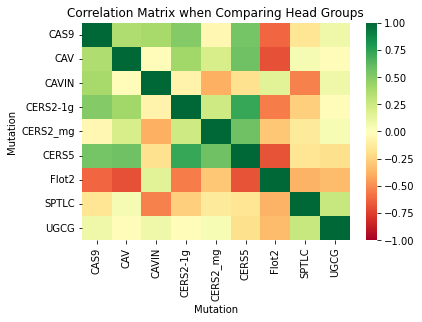

In [23]:
corr_matrix(df_meta2, df_p, 
            col='Head Group 2', 
            drop_var=['PE', 'PC'],
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Head Groups'
           )

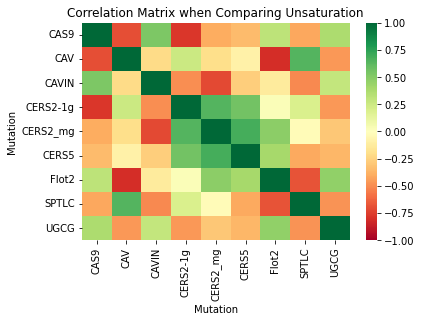

In [24]:
corr_matrix(df_meta2, df_p, 
            col='Unsaturation', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Unsaturation'
           )

# Clustermap of correlation matrix

In [25]:
'''
Returns the correlation matrix sorted by similarity (clustered) for a dataset when comparing by specific proteins
Data is normalized by column and row

Inputs:
df_meta: df with lipid metadata (sample, head group, chain length, unsaturation)
df_p: df with columns named by mutation, rather than individual experiments
col: column name for variable of interest (ex: head group 2)
drop_var: list variable of interests (rows) to be dropped (ex: head group PE)
drop_protein: list of mutations (columns) to be dropped (ex: WT)
title: title of graph, string
annot: include annotations, takes True or False
'''
def cluster_matrix(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Correlation Matrix', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the sample
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['Mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('Mutation').mean()
    
    # normalize by the variable (column)
    df = norm_col(df)
    
    # transpose again so proteins are columns, then run a correlation matrix
    corr = df.T.corr()
    
    sns.set(rc={"figure.facecolor": "white"})
    sns.clustermap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=annot).fig.suptitle(title, y=1.05)

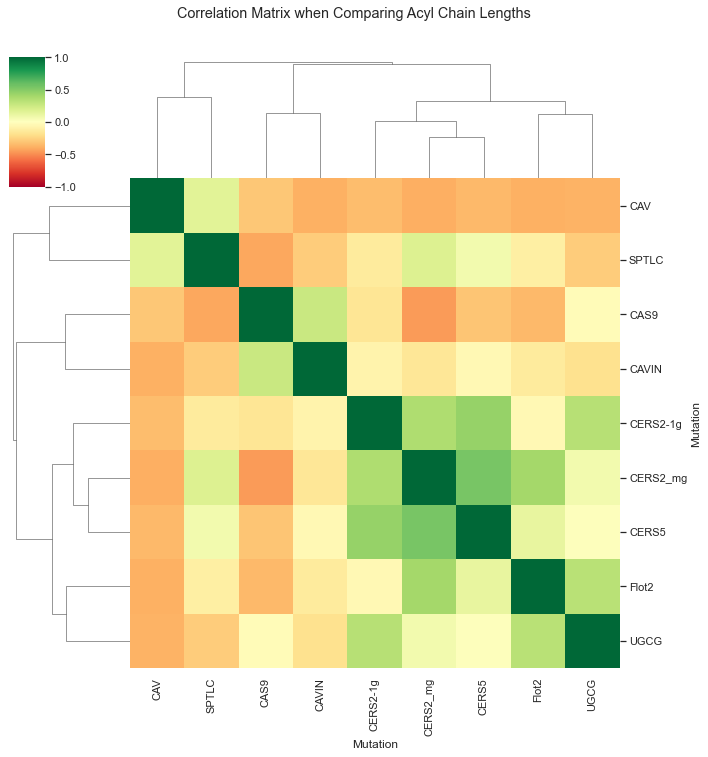

In [86]:
cluster_matrix(df_meta2, df_p, 
            col='Acyl Chain Length', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Acyl Chain Lengths'
           )
plt.savefig('graphs/pos_mode_whole_dataset/chain_length_graphs/updated_HeadGroupCorr_Heatmap_WithPS.png', dpi=300)

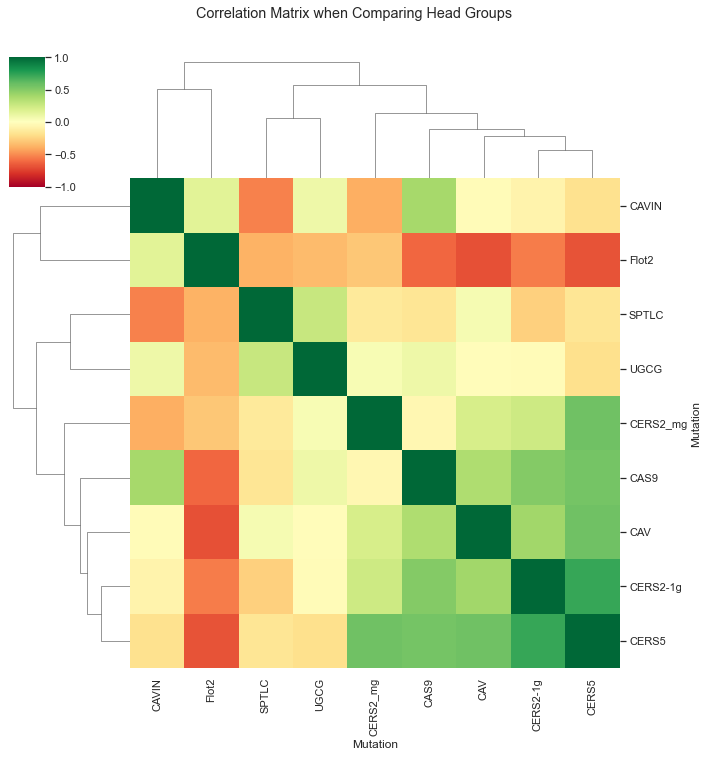

In [85]:
cluster_matrix(df_meta2, df_p, 
            col='Head Group 2', 
            drop_var=['PE', 'PC'],
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Head Groups'
           )
plt.savefig('graphs/pos_mode_whole_dataset/head_group_graphs/updated_HeadGroupCorr_Heatmap_WithPS.png', dpi=300)

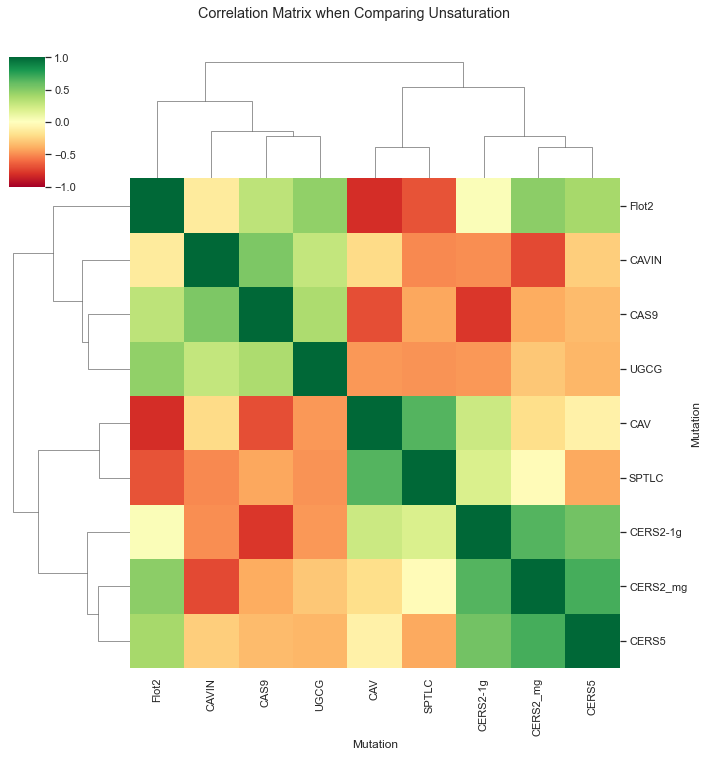

In [87]:
cluster_matrix(df_meta2, df_p, 
            col='Unsaturation', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Unsaturation'
           )
plt.savefig('graphs/pos_mode_whole_dataset/unsaturation_graphs/updated_UnsaturationCorr_Heatmap_WithPS.png', dpi=300)

# Heatmaps

In [29]:
'''
Returns heatmap, with values normalized down the column
'''
def heatmap_norm_col(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Heatmap', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the mutation
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['Mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('Mutation').mean()
    
    # transpose so that mutations are in columns again
    df = df.T
    
    sns.set(rc={"figure.facecolor": "white"})
    sns.clustermap(df, vmin=0, vmax=1, cmap='Reds', annot=annot).fig.suptitle(title, y=1.05)

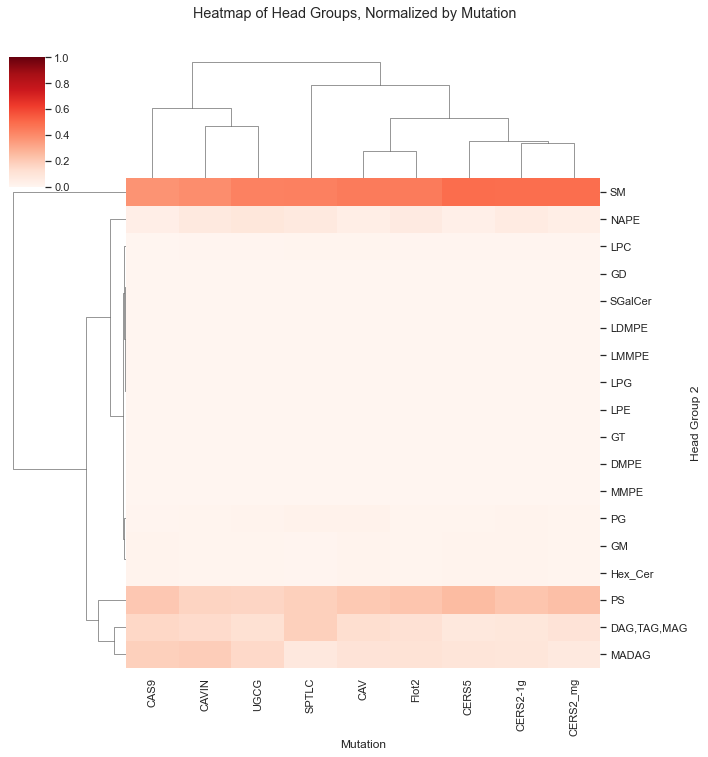

In [30]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Head Group 2',
        drop_var=['PE', 'PC'],
        drop_protein=['WT'],
        title='Heatmap of Head Groups, Normalized by Mutation'
       )

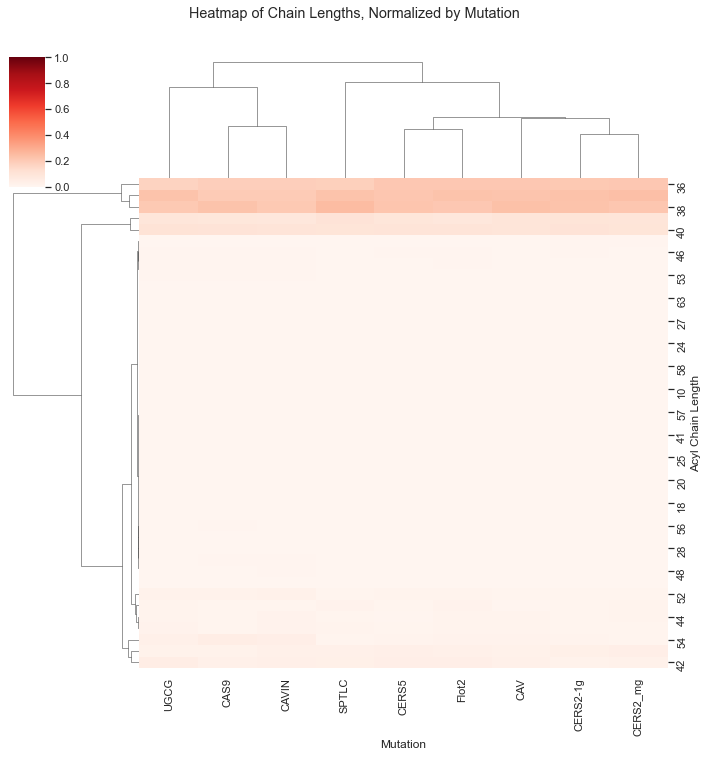

In [31]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Acyl Chain Length',
        drop_protein=['WT'],
        title='Heatmap of Chain Lengths, Normalized by Mutation'
       )

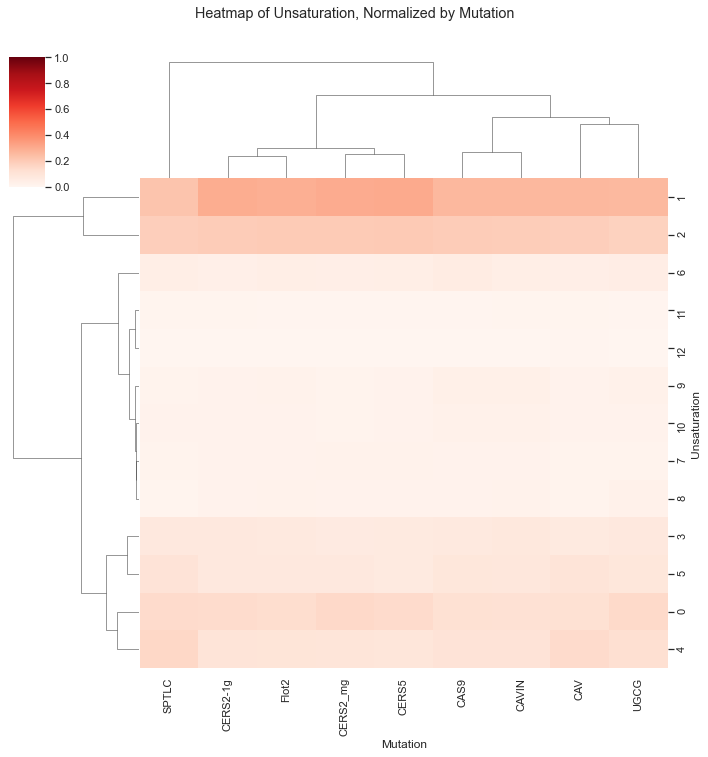

In [32]:
heatmap_norm_col(df_meta2,
        df_p,
        col='Unsaturation',
        drop_protein=['WT'],
        title='Heatmap of Unsaturation, Normalized by Mutation'
       )

In [33]:
'''
Returns heatmap with values normalized by row
'''
def heatmap_norm_row(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Heatmap', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    
    # name columns so that we can group by them once transposed
    df.columns.names=['mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('mutation').mean()
    
    # transpose so that mutations are in columns again
    df = df.T
    df = norm_row(df)
    # print(df.sum(axis=1))
    
    sns.set(rc={"figure.facecolor": "white"})
    sns.clustermap(df, vmin=0, vmax=1, cmap='Reds', annot=annot).fig.suptitle(title, y=1.05)

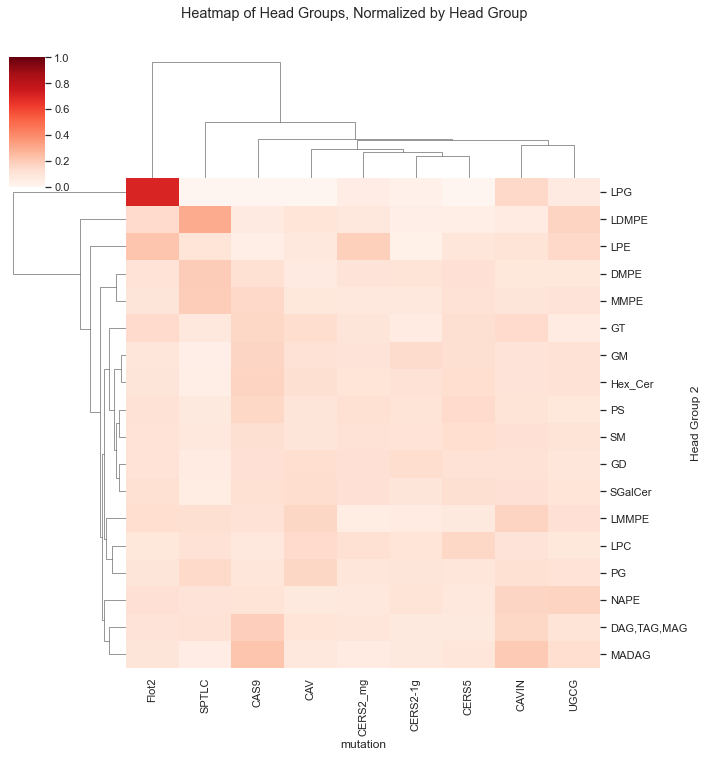

In [34]:
heatmap_norm_row(df_meta2,
                 df_p,
                 col='Head Group 2',
                 drop_var=['PE', 'PC'],
                 drop_protein=['WT'],
                 title='Heatmap of Head Groups, Normalized by Head Group'
                )

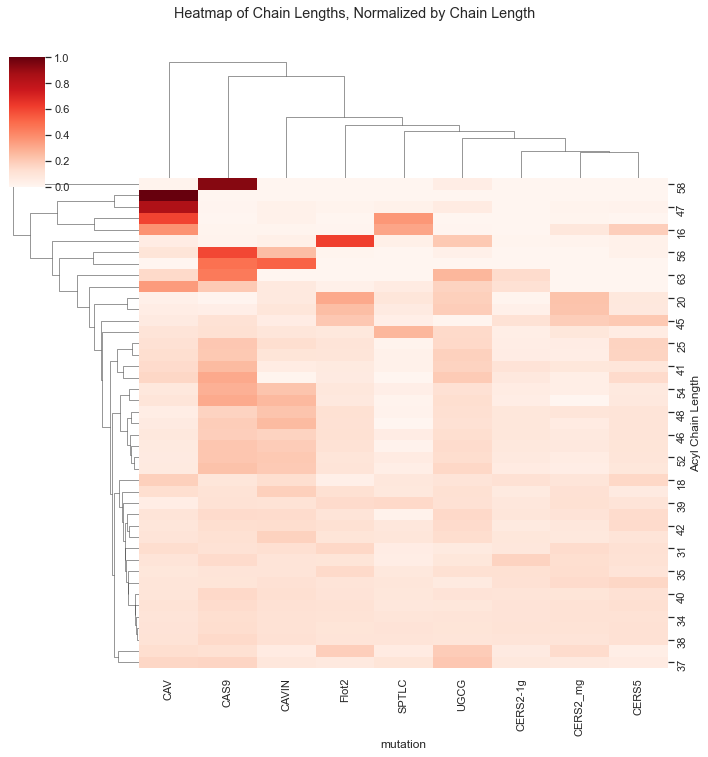

In [35]:
heatmap_norm_row(df_meta2,
        df_p,
        col='Acyl Chain Length',
        drop_protein=['WT'],
        title='Heatmap of Chain Lengths, Normalized by Chain Length'
       )

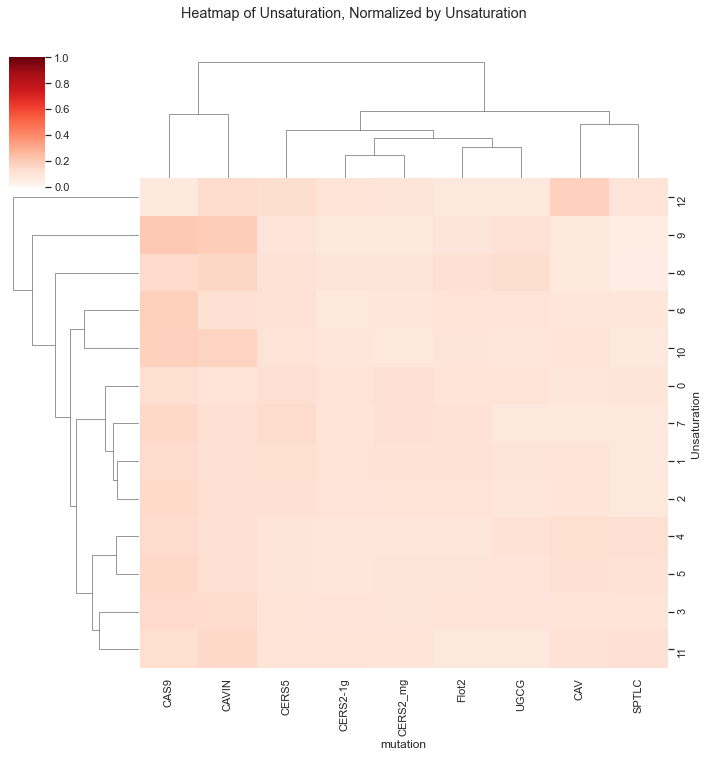

In [36]:
heatmap_norm_row(df_meta2,
                 df_p,
                 col='Unsaturation',
                 drop_protein=['WT'],
                 title='Heatmap of Unsaturation, Normalized by Unsaturation',
                )

In [37]:
'''
Returns heatmap, with values normalized by both column and row
'''
def heatmap_norm(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Heatmap', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the mutation
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['Mutation']
    # transpose and then find the average value for each protein
    df = df.T.groupby('Mutation').mean()
    
    # transpose so that mutations are in columns again
    df = df.T
    # normalize by the variable (row)
    df = norm_row(df)
    # print(df.sum(axis=1))
    
    sns.set(rc={"figure.facecolor": "white"})
    sns.clustermap(df, vmin=0, vmax=1, cmap='Reds', annot=annot).fig.suptitle(title, y=1.05)

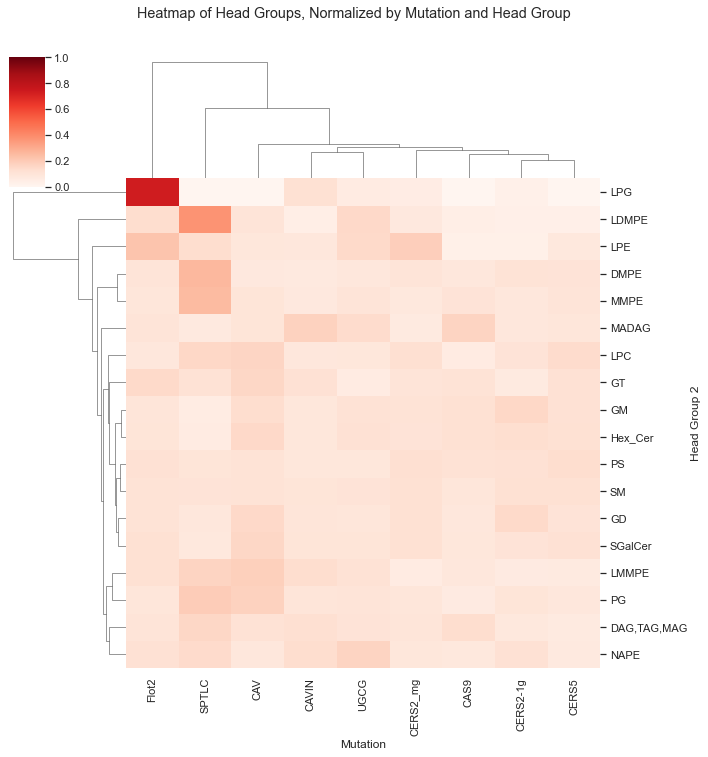

In [38]:
heatmap_norm(df_meta2,
        df_p,
        col='Head Group 2',
        drop_var=['PE', 'PC'],
        drop_protein=['WT'],
        title='Heatmap of Head Groups, Normalized by Mutation and Head Group'
       )

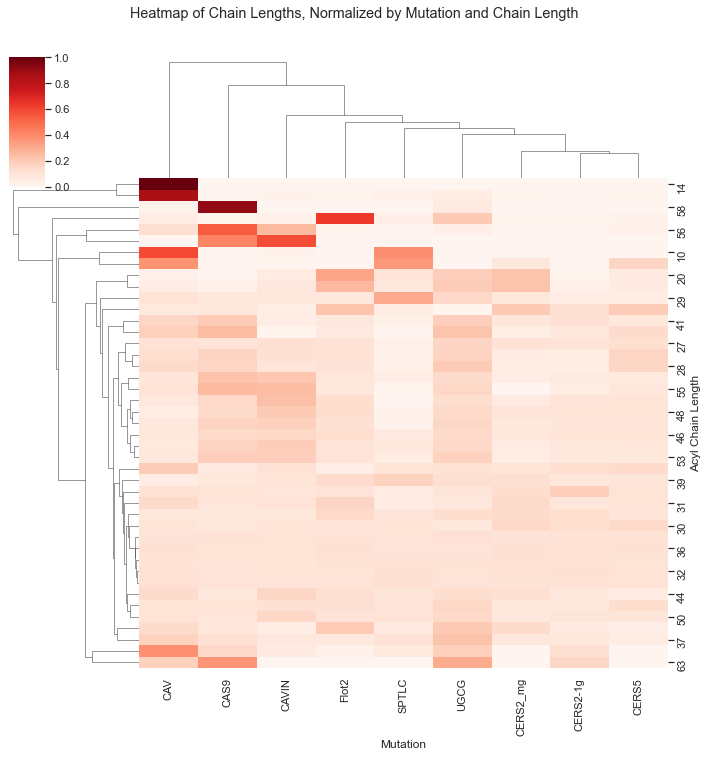

In [39]:
heatmap_norm(df_meta2,
        df_p,
        col='Acyl Chain Length',
        drop_protein=['WT'],
        title='Heatmap of Chain Lengths, Normalized by Mutation and Chain Length'
       )

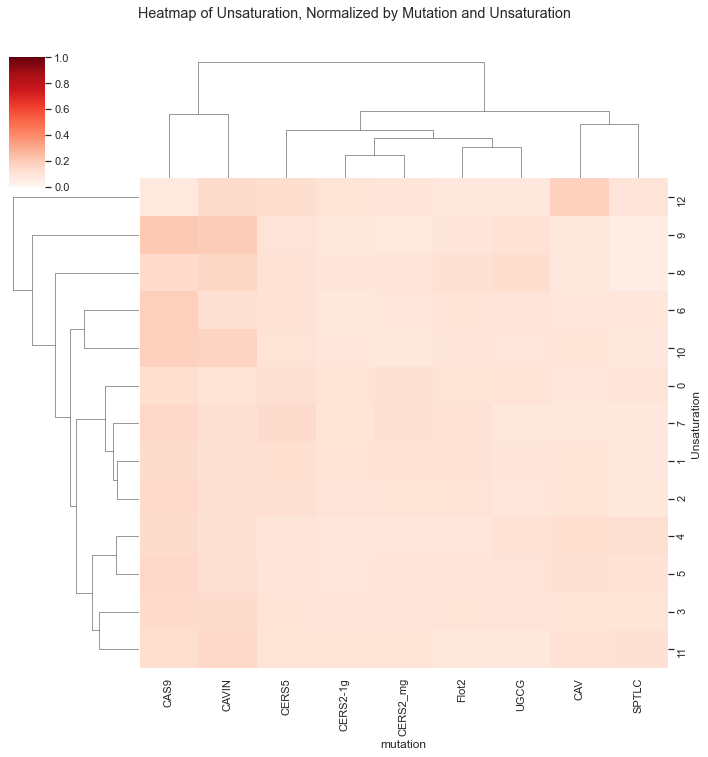

In [40]:
heatmap_norm_row(df_meta2,
                 df_p,
                 col='Unsaturation',
                 drop_protein=['WT'],
                 title='Heatmap of Unsaturation, Normalized by Mutation and Unsaturation',
                )

# Heatmaps without row clustering

In [41]:
# import functions
import functions

### Acyl Chain Length

#### Acyl Chain Length, Evens

In [42]:
df_cl = functions.groupby_norm(df_meta2, 
                               df_p,
                               var='Acyl Chain Length',
                               drop_var=list(range(1,70,2)),
                               drop_mutation=['WT'])

Text(0.5, 1.05, 'Heatmap of Chain Lengths, Normalized by Mutation and Chain Length')

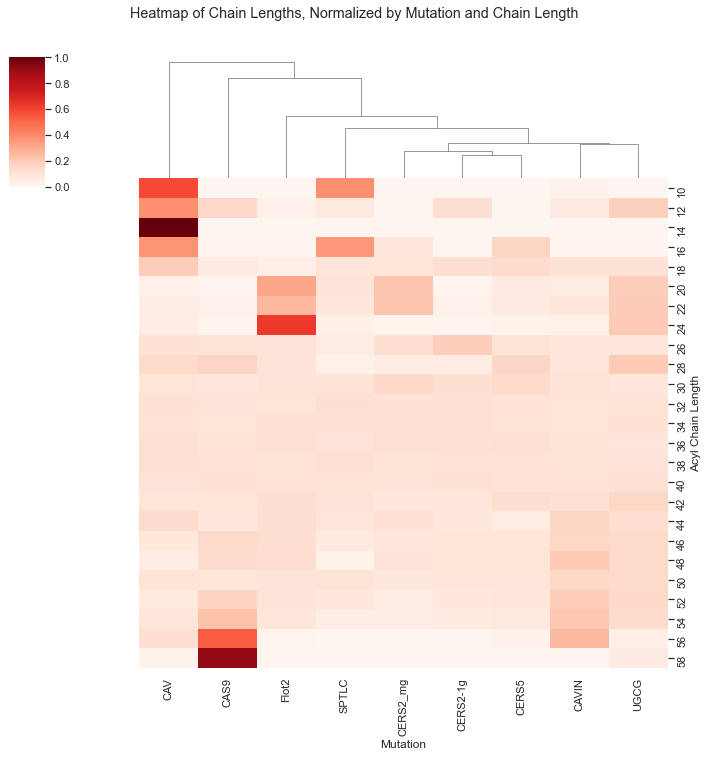

In [43]:
sns.set(rc={"figure.facecolor": "white"})
sns.clustermap(df_cl, row_cluster=False, cmap='Reds').fig.suptitle('Heatmap of Chain Lengths, Normalized by Mutation and Chain Length', y=1.05)

#### Acyl Chain Length, Odds

In [44]:
df_cl_o = functions.groupby_norm(df_meta2, 
                                 df_p, 
                                 var='Acyl Chain Length', 
                                 drop_var=list(range(0,70,2)), 
                                 drop_mutation=['WT'])

Text(0.5, 1.05, 'Heatmap of Odd Chain Lengths, Normalized by Mutation and Chain Length')

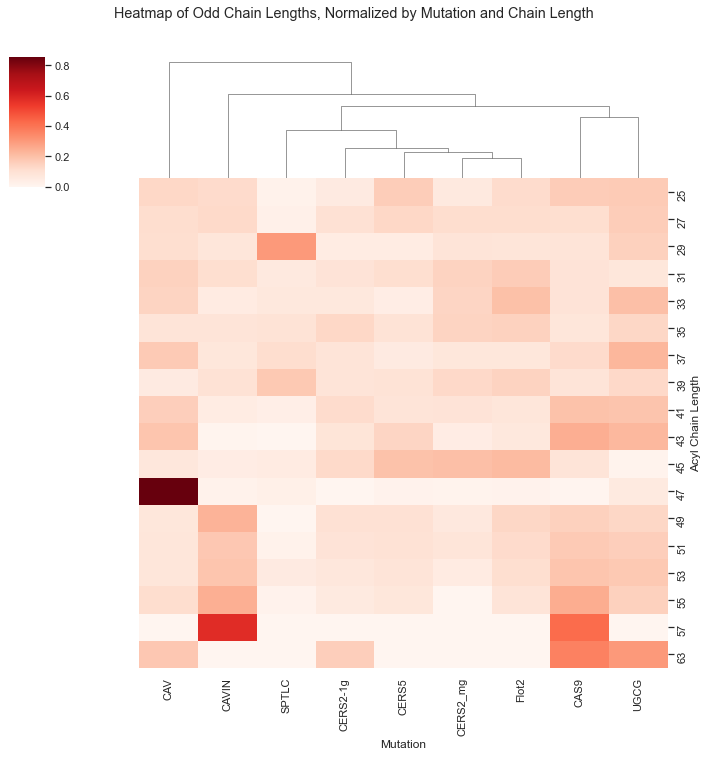

In [45]:
sns.set(rc={"figure.facecolor": "white"})
sns.clustermap(df_cl_o, row_cluster=False, cmap='Reds').fig.suptitle('Heatmap of Odd Chain Lengths, Normalized by Mutation and Chain Length', y=1.05)

### Unsaturation

In [46]:
df_u = functions.groupby_norm(df_meta, df_p, var='Unsaturation', drop_mutation=['WT'])
df_u

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG
Unsaturation,,,,,,,,,
0,0.099649,0.100077,0.098056,0.114639,0.123641,0.117416,0.111268,0.116177,0.119078
1,0.105985,0.106559,0.107304,0.120766,0.122091,0.123930,0.117789,0.090590,0.104988
2,0.112880,0.107518,0.110806,0.112632,0.114917,0.116835,0.115799,0.107730,0.100882
3,0.108747,0.106039,0.123815,0.115036,0.098845,0.102460,0.111201,0.118961,0.114898
4,0.105707,0.139490,0.103947,0.100760,0.094874,0.087360,0.094953,0.149054,0.123855
5,0.116541,0.132569,0.111025,0.098995,0.100004,0.089121,0.099545,0.140172,0.112029
6,0.141487,0.100542,0.110273,0.096501,0.097258,0.109691,0.115354,0.112978,0.115916
7,0.117179,0.095368,0.108986,0.107783,0.130142,0.129542,0.121103,0.095063,0.094834
8,0.111241,0.087925,0.139962,0.106160,0.102886,0.110463,0.131125,0.059627,0.150611


Text(0.5, 1.05, 'Heatmap of Unsaturation, Normalized by Mutation and Unsaturation')

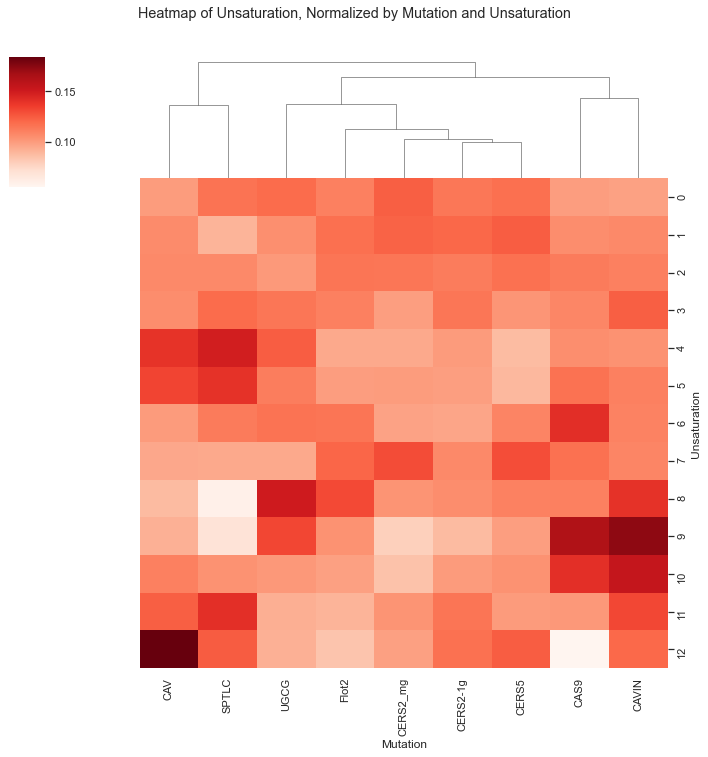

In [47]:
sns.set(rc={"figure.facecolor": "white"})
sns.clustermap(df_u, row_cluster=False, cmap='Reds').fig.suptitle('Heatmap of Unsaturation, Normalized by Mutation and Unsaturation', y=1.05)

#### Unsaturation, grouped

In [48]:
# group unsaturation
import numpy as np
df_meta2['Unsaturation 2'] = np.where(df_meta2['Unsaturation'] < 3, df_meta2['Unsaturation'], '>=3')
df_meta2.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2,Unsaturation 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer,>=3
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,Hex_Cer,2
2,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer,26,2,Hex_Cer,2
3,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer,26,0,Hex_Cer,0
4,Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer,26,0,Hex_Cer,0


In [49]:
df_u2 = functions.groupby_norm(df_meta2, df_p, var='Unsaturation 2', drop_mutation=['WT'])
df_u2

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG
Unsaturation 2,,,,,,,,,
0,0.099649,0.100077,0.098056,0.114639,0.123641,0.117416,0.111268,0.116177,0.119078
1,0.105985,0.106559,0.107304,0.120766,0.122091,0.123930,0.117789,0.090590,0.104988
2,0.112880,0.107518,0.110806,0.112632,0.114917,0.116835,0.115799,0.107730,0.100882
>=3,0.117591,0.119601,0.118223,0.102700,0.097689,0.097641,0.104340,0.124821,0.117394


Text(0.5, 1.05, 'Heatmap of Unsaturation, Normalized by Mutations and Unsaturation')

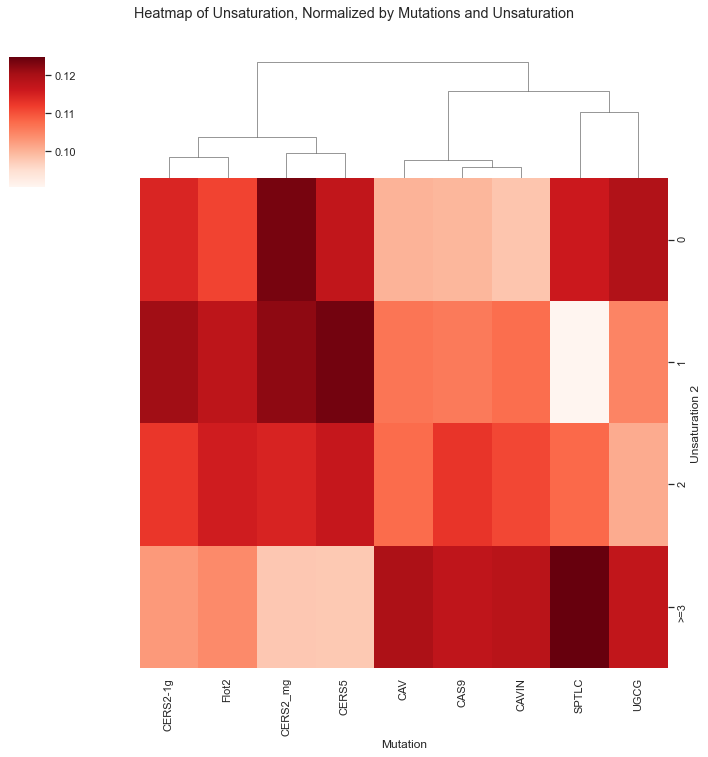

In [50]:
sns.set(rc={"figure.facecolor": "white"})
sns.clustermap(df_u2, row_cluster=False, cmap='Reds').fig.suptitle('Heatmap of Unsaturation, Normalized by Mutations and Unsaturation', y=1.05)

# Bubble Heatmap

In [51]:
def extract_clustered_table(res, data):
    """
    input
    =====
    res:     <sns.matrix.ClusterGrid>  the clustermap object
    data:    <pd.DataFrame>            input table
    
    output
    ======
    returns: <pd.DataFrame>            reordered input table
    """
    
    # if sns.clustermap is run with row_cluster=False:
    if res.dendrogram_col is None:
        print("Apparently, columns were not clustered.")
        return -1
#     
    if res.dendrogram_row is not None:
        # reordering index and columns
        new_cols = data.columns[res.dendrogram_col.reordered_ind]
        new_ind = data.index[res.dendrogram_row.reordered_ind]
        
        return data.loc[new_ind, new_cols]
    
    else:
        # reordering the columns
        new_cols = data.columns[res.dendrogram_col.reordered_ind]

        return data.loc[:,new_cols]

In [52]:
# umap = sns.clustermap(df_u2, row_cluster=False, cmap='Reds', annot=True)

In [53]:
# u_ordered = extract_clustered_table(umap, df_u2)
# u_ordered.head()

In [54]:
# ul = u_ordered.reset_index().melt('Unsaturation 2')
# import altair as alt

# b = alt.Chart(ul).mark_rect(stroke='lightgray', fill=None).encode(
#     x = alt.X('Mutation:N', sort=None),
#     y = 'Unsaturation 2:O',
# ).properties(
#     width=800,
#     height=500,
#     title= 'Heatmap of Unsaturation, Normalized by Mutations and Unsaturation'
# )

# c = alt.Chart(ul).mark_circle().encode(
#     x = alt.X('Mutation:N', sort=None),
#     y = alt.Y('Unsaturation 2:O').title('Unsaturation'),
#     size=alt.Size('value:Q').scale(domain=[min(ul['value']), max(ul['value'])], range=[1000,6500]).legend(None),
#     color=alt.Color('value:Q').scale(scheme='lightgreyred', domain=(min(ul['value']), max(ul['value']))).legend(title='Fraction')
# )

# (b+c).configure(background='white')

In [55]:
def bubble_heatmap(res, data, var_type, cmap='yellowgreenblue', cmap_domain=[]):
    import altair as alt 
    
    # get ordered table
    res_ordered = extract_clustered_table(res, data)
    
    # get variable name and axis title
    var = res_ordered.index.name
    var_title = var.rsplit(' ', 1)[0]
    
    # create long form of data
    l = res_ordered.reset_index().melt(var, value_name='Fraction')
    
    # get domain for cmap
    if cmap_domain == []:
        cmap_domain = [min(l['Fraction']), max(l['Fraction'])]
    
    # create grid for heatmap
    b = alt.Chart(l).mark_rect(stroke='lightgray', fill=None).encode(
        x = alt.X('Mutation:N', sort=None),
        y = alt.Y(var, type=var_type, sort=None)
    ).properties(
        width=800,
        height= ((800/len(res_ordered.columns)) * len(res_ordered.index)),
        title= 'Heatmap of {var_name}, Normalized by Mutations and {var_name}'.format(var_name=var_title)   
    )
      
    # create bubbles for heatmap
    c = alt.Chart(l).mark_circle().encode(
        x = alt.X('Mutation:N', sort=None),
        y = alt.Y(var, type=var_type, sort=None).title(var_title),
        size=alt.Size('Fraction:Q').scale(domain=cmap_domain, range=[1000,6500]),
        color=alt.Color('Fraction:Q').scale(scheme=cmap, domain=cmap_domain),
        tooltip=['Mutation', var, 'Fraction']
    ) 
    
    return (b+c).configure(background='white')

In [56]:
# cmap = sns.clustermap(df_cl, row_cluster=False, cmap='Reds')

In [57]:
# df_h = functions.groupby_norm(df_meta2, 
#                                df_p,
#                                var='Head Group 2',
#                                drop_mutation=['WT'])

In [58]:
# hmap = sns.clustermap(df_h, cmap='Reds')

In [59]:
# # get ordered table
# res_ordered = extract_clustered_table(cmap, df_cl)
    
# # create long form of data
# l = res_ordered.reset_index().melt(var)
    
# # create grid for heatmap
# b = alt.Chart(l).mark_rect(stroke='lightgray', fill=None).encode(
#     x = alt.X('Mutation:N', sort=None),
#     y = alt.Y('Acyl Chain Length:O')
# ).properties(
#     title= 'Heatmap of Acyl Chain Length, Normalized by Mutations and Acyl Chain Length',
#     width = 800,
#     height = 2222
# )
      
# # create bubbles for heatmap
# c = alt.Chart(l).mark_circle().encode(
#     x = alt.X('Mutation:N', sort=None),
#     y = alt.Y('Acyl Chain Length:O').title('Acyl Chain Length'),
#     size=alt.Size('value:Q').scale(domain=[min(l['value']), max(l['value'])], range=[1000,6500]).legend(None),
#     color=alt.Color('value:Q').scale(scheme='lightgreyred', domain=(min(l['value']), max(l['value']))).legend(title='Fraction')
# )
    
# (b+c).configure(background='white')

In [60]:
# bubble_heatmap(cmap, df_cl, var_type='ordinal', cmap_domain=[0,1])

In [61]:
# bubble_heatmap(umap, df_u2, var_type='ordinal')

In [62]:
# bubble_heatmap(hmap, df_h, 'nominal', cmap='yellowgreenblue', cmap_domain=[0,1])

In [63]:
df_cl = functions.groupby_norm(df_meta2, 
                     df_p, 
                     var='Acyl Chain Length', 
                     drop_var=list(range(1, 70, 2)), 
                     drop_mutation = ['WT'],
                     norm_var=False
                    )

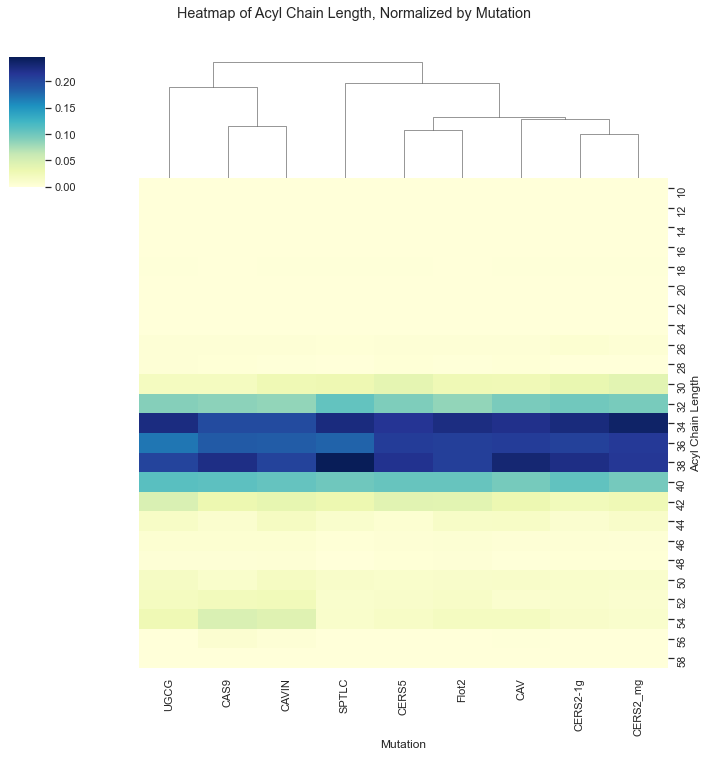

In [90]:
sns.set(rc={"figure.facecolor": "white"})
cmap = sns.clustermap(df_cl, row_cluster=False, cmap='YlGnBu').fig.suptitle('Heatmap of Acyl Chain Length, Normalized by Mutation', y=1.05)

In [65]:
functions.bubble_heatmap(cmap, df_cl, var_type='ordinal', title='Heatmap of Acyl Chain Length, Normalized by Mutation')

alt.LayerChart(...)

In [66]:
df_h = functions.groupby_norm(df_meta2, 
                     df_p, 
                     var='Head Group 2', 
                     drop_mutation = ['WT'],
                     norm_var=False
                    )

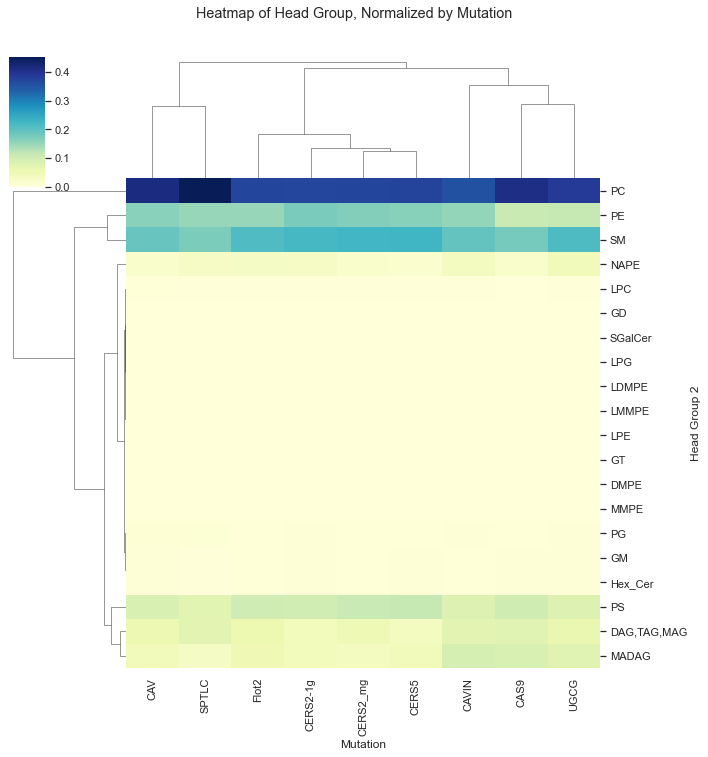

In [91]:
sns.set(rc={"figure.facecolor": "white"})
hmap = sns.clustermap(df_h, cmap='YlGnBu').fig.suptitle('Heatmap of Head Group, Normalized by Mutation', y=1.05)

In [68]:
functions.bubble_heatmap(hmap, df_h, var_type='nominal', title='Heatmap of Head Groups, Normalized by Mutation')

alt.LayerChart(...)

In [69]:
df_u = functions.groupby_norm(df_meta2, 
                     df_p, 
                     var='Unsaturation 2',
                     drop_mutation = ['WT'],
                     norm_var=False
                    )

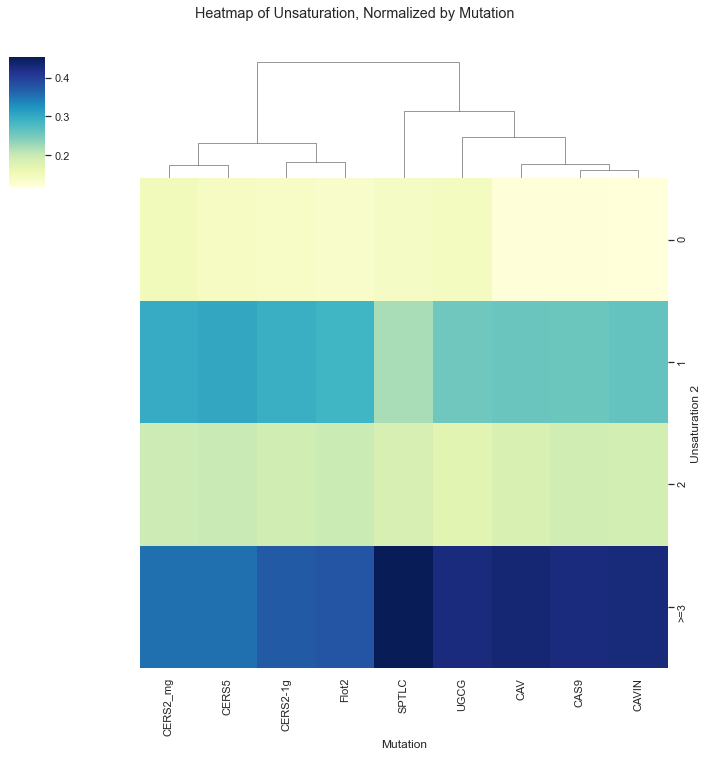

In [92]:
sns.set(rc={"figure.facecolor": "white"})
umap = sns.clustermap(df_u, row_cluster=False, cmap='YlGnBu').fig.suptitle('Heatmap of Unsaturation, Normalized by Mutation', y=1.05)

In [71]:
functions.bubble_heatmap(umap, df_u, var_type='ordinal', title='Heatmap of Unsaturation, Normalized by Mutation')

alt.LayerChart(...)

# Fold Change from CAS9

/Users/madhunarendran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


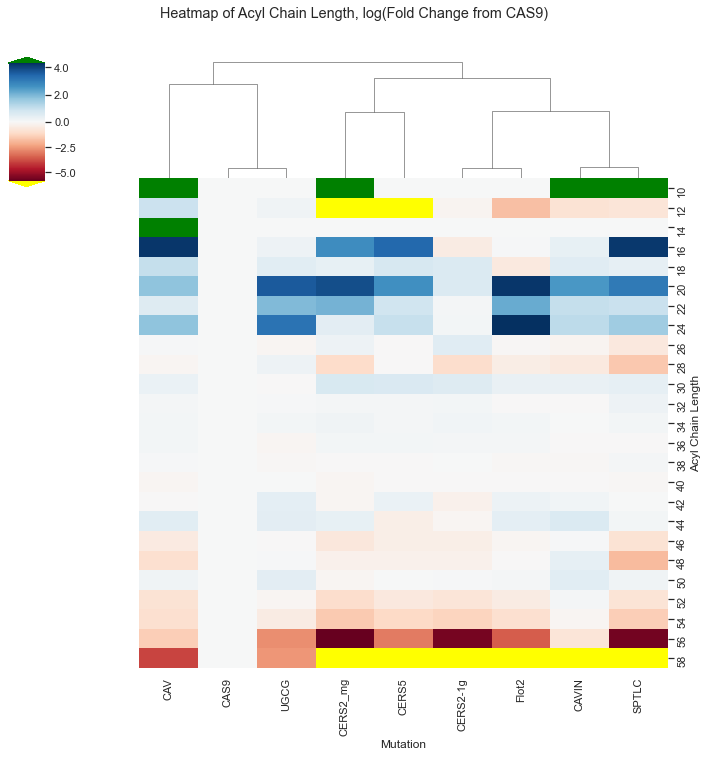

In [72]:
cl_fold, clmax, clmin = functions.fold_change(df_meta2,
                               df_p,
                               var='Acyl Chain Length',
                               mtn='CAS9',
                               drop_var=list(range(1,70,2)),
                               drop_mutation=['WT'],
                               row_cluster=False)

/Users/madhunarendran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


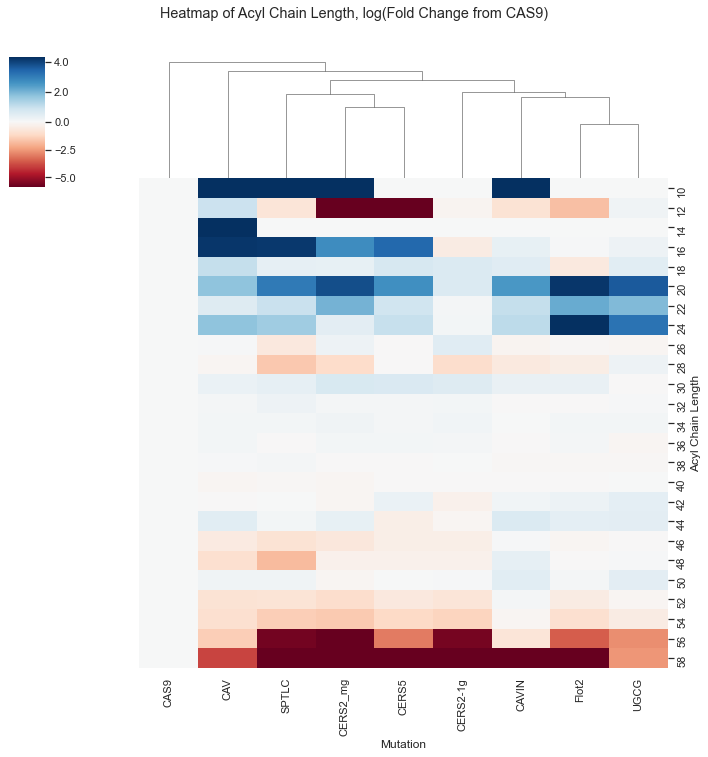

In [73]:
cl_fold, clmax, clmin = functions.fold_change(df_meta2,
                               df_p,
                               var='Acyl Chain Length',
                               mtn='CAS9',
                               drop_var=list(range(1,70,2)),
                               drop_mutation=['WT'],
                               row_cluster=False,
                               outlier=False)

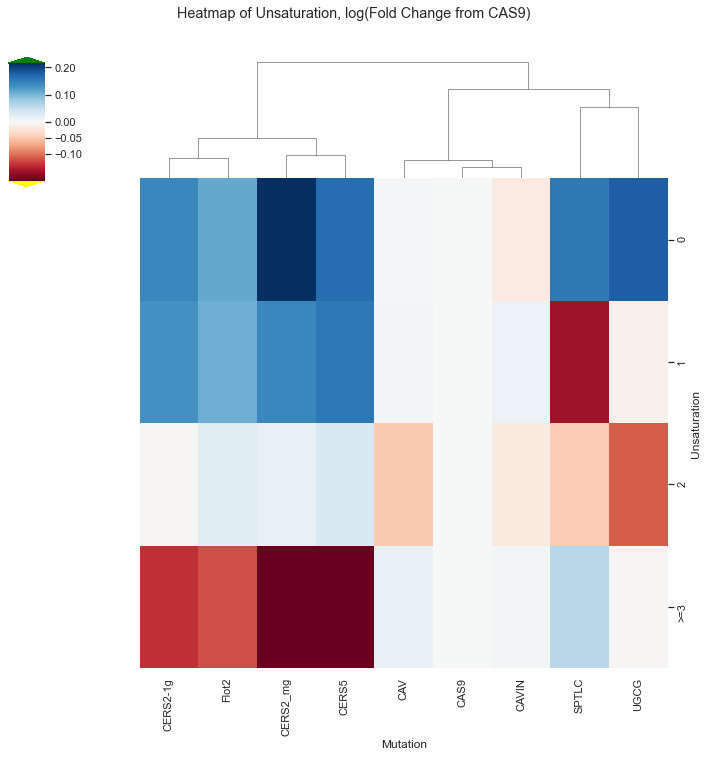

In [74]:
u_fold, umax, umin = functions.fold_change(df_meta2,
                               df_p,
                               var='Unsaturation 2',
                               renamed_var='Unsaturation',
                               mtn='CAS9',
                               drop_mutation=['WT'],
                               row_cluster=False)

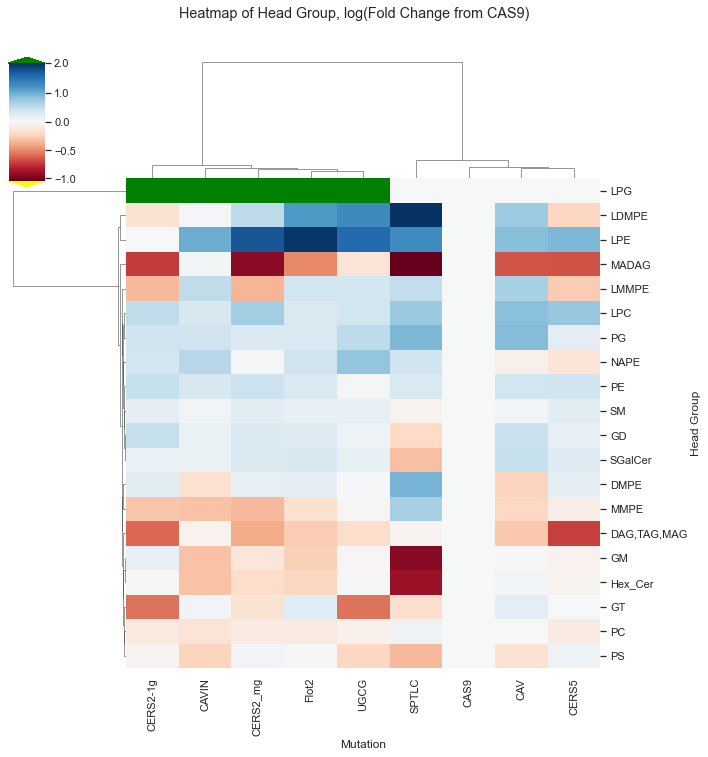

In [75]:
h_fold, hmax, hmin = functions.fold_change(df_meta2,
                                           df_p,
                                           var='Head Group 2',
                                           renamed_var='Head Group',
                                           mtn='CAS9',
                                           drop_mutation=['WT'],
                                           row_cluster=True,
                                           cbar_args={'vmax' : 2, 'tmax': 2}
                                          )

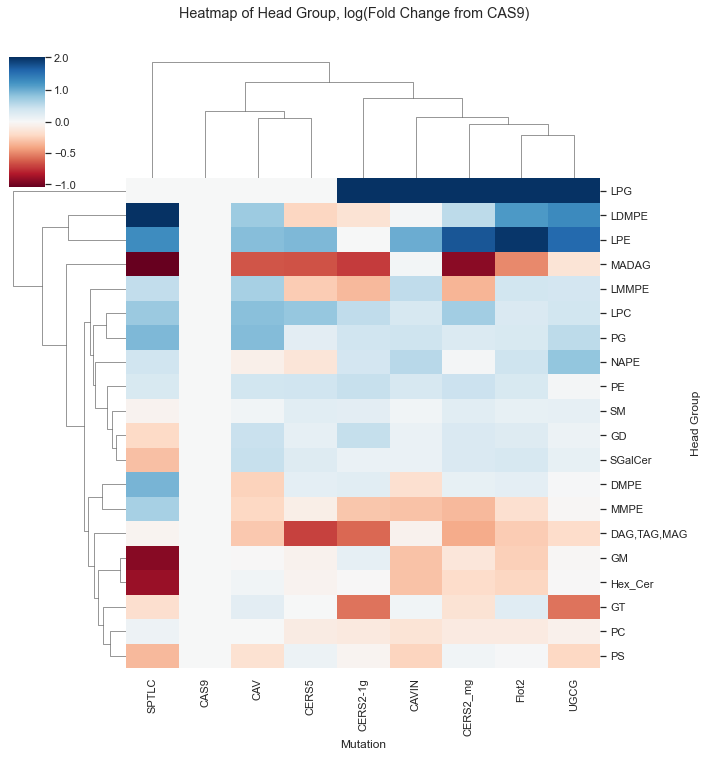

In [76]:
h_fold, hmax, hmin = functions.fold_change(df_meta2,
                                           df_p,
                                           var='Head Group 2',
                                           renamed_var='Head Group',
                                           mtn='CAS9',
                                           drop_mutation=['WT'],
                                           row_cluster=True,
                                           outlier=False,
                                           cbar_args={'vmax' : 2, 'tmax': 2}
                                          )

In [93]:
#h_fold

In [94]:
#df_cl.div(df_cl['CAS9'], axis=0)

In [95]:
#df_cl